In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

prefix = "../../data/contest/"
train = pd.read_csv(prefix + "train.tsv")
test = pd.read_csv(prefix + "test.tsv")
sample_submission = pd.read_csv(prefix + "sample_submission.tsv")

In [6]:
from sklearn.model_selection import train_test_split

frac = 1 # fraction of learning examples used for model fitting

# sample the train set if your don't want to deel with all examples
train = train.sample(frac=frac, random_state=501)

In [7]:
train_data = test_data = train.drop(['Num'], axis=1).iloc[:, :-30]
# for i in range(1, 31):
#     train_data['f' + str(i)] = np.log(train_data['f' + str(i)])

# train_data = train_data.replace([-np.inf, np.inf], np.nan).dropna()
    
print(len(train_data))

72457


In [66]:
train_data.replace?

In [63]:
train_data.head()

,y,year,week,shift,item_id,f1,f2,f3,f4,f5,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
62428,2577,2014,40,1,20438687,9.781602,9.673445,9.749753,9.797293,9.786954,...,9.692149,9.784986,9.637371,9.789759,9.675645,9.651173,9.464672,8.885303,8.396155,8.011355
31912,15673,2013,47,2,20438673,9.104202,9.321345,9.072227,8.997147,9.231123,...,9.031214,9.141633,9.182866,9.319643,9.163773,9.164296,9.159047,9.188606,9.490998,8.509161
66545,681,2014,46,1,20438923,7.659171,7.718685,7.878534,7.377759,7.580700,...,6.152733,5.940171,5.598422,5.913503,5.940171,4.382027,4.094345,3.401197,4.248495,3.912023
22831,1030,2013,33,1,20449962,5.541264,5.843544,6.313548,5.799093,6.244167,...,6.536692,5.370638,6.309918,6.665684,6.593045,6.396930,6.586172,6.785588,6.606650,6.818924
33081,6963,2013,48,1,20439405,8.274357,7.771067,8.202482,8.266164,8.377931,...,8.236156,8.385945,8.313852,7.922986,8.032685,8.056744,8.437067,7.469084,7.939515,8.081784


In [6]:
def smape(y1, y2):
    y1 = np.array(y1)
    y2 = np.array(y2)
    n = len(y1)
    return np.sum(2 * np.absolute(y1 - y2) / n / (np.absolute(y1) + np.absolute(y2)))


from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


def cross_validation(model, k=5, frac=0.8, metric=smape):
    N = int(len(test_data) * frac)
    delta = (len(test_data) - N) // k
    
    X = test_data.drop(['y'], axis=1)
    y = test_data['y']
    
    score = 0.
    for i in range(k):
        n = int(N * frac)
        cv_x_train = X.iloc[i * delta:i * delta + n, :]
        cv_x_test = X.iloc[i * delta + n:i * delta + N, :]
        cv_y_train = y.iloc[i * delta:i * delta + n]
        cv_y_test = y.iloc[i * delta + n:i * delta + N]
        
        model.fit(cv_x_train, np.log(cv_y_train))
        score += metric(cv_y_test, np.exp(model.predict(cv_x_test)))
    
    return score / k

In [101]:
%%time
from sklearn.ensemble import RandomForestRegressor
for n in range(105, 156, 10):
    print(n, cross_validation(RandomForestRegressor(n_estimators=n, n_jobs=3, random_state=501)))

105 0.280274003791
115 0.280012053199
125 0.279883893331
135 0.279180528879
145 0.279205595682
155 0.279403749193
CPU times: user 3min 32s, sys: 777 ms, total: 3min 33s
Wall time: 2min 2s


In [104]:
%%time
from sklearn.ensemble import RandomForestRegressor
for n in range(135, 146, 2):
    print(n, cross_validation(RandomForestRegressor(n_estimators=n, n_jobs=3, random_state=501)))

135 0.279180528879
137 0.279248574516
139 0.279153645524
141 0.2790465229
143 0.279181152082
145 0.279205595682
CPU times: user 3min 48s, sys: 910 ms, total: 3min 49s
Wall time: 2min 9s


In [77]:
%%time
from sklearn.ensemble import ExtraTreesRegressor
for n in range(105, 156, 10):
    print(n, cross_validation(ExtraTreesRegressor(n_estimators=n, n_jobs=3, random_state=501)))

105 0.259631978575
115 0.259164143008
125 0.259027507523
135 0.258949881645
145 0.258800741234
155 0.258875362249
CPU times: user 1min 12s, sys: 467 ms, total: 1min 12s
Wall time: 43.5 s


In [78]:
%%time
from sklearn.ensemble import ExtraTreesRegressor
for n in range(135, 146, 2):
    print(n, cross_validation(ExtraTreesRegressor(n_estimators=n, n_jobs=3, random_state=501)))

135 0.258949881645
137 0.258926019885
139 0.258965054746
141 0.258873945969
143 0.258771527139
145 0.258800741234
CPU times: user 1min 17s, sys: 390 ms, total: 1min 17s
Wall time: 45.4 s


In [12]:
%%time
from xgboost import XGBRegressor
for n in range(180, 282, 20):
    print(n, cross_validation(XGBRegressor(n_estimators=n, nthread=3)))

180 0.254376752537
200 0.25325860987
220 0.252453209902
240 0.25156683019
260 0.250527146651
280 0.249798315588
CPU times: user 1min 27s, sys: 843 ms, total: 1min 28s
Wall time: 49.2 s


In [26]:
for d in range(1, 21, 2):
    print(d, cross_validation(XGBRegressor(n_estimators=360, nthread=3, max_depth=d)))

1 0.291424389096
3 0.24620464232
5 0.23554554669
7 0.236361265904


KeyboardInterrupt: 

# Ищем ответы на запросы в самих запросах

In [4]:
smth = train.sort_values(by=['item_id', 'year', 'week']).loc[train['shift'] == 1].iloc[:100, [2, 3, 4, 5, 6, -3, -2, -1, 1]]

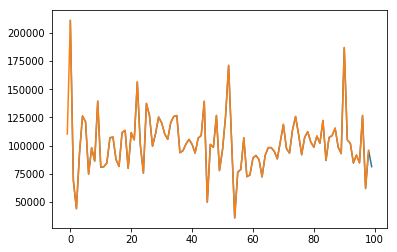

0.000193242515351


In [8]:
plt.plot(range(len(smth)), smth['y'] * 0.62)
plt.plot(range(-1, len(smth) - 1), smth['f60'])
plt.show()

print(smape(smth['y'].iloc[:-1] * 0.621, smth['f60'].iloc[1:]))

In [8]:
coef = 0.621

In [175]:
smth = test.sort_values(by=['item_id', 'year', 'week']).loc[test['shift'] == 2].iloc[:, [1, 2, 3, 4, 5, 6, -2, -1]]

In [25]:
good_pred = dict()

ids = list(test['Num'])

for idx in ids:
    row = test.loc[test['Num'] == idx]
#     next_row = test.loc[test['item_id'] == int(row['item_id'])]\
#     .loc[test['year'] == int(row['year'])]\
#     .loc[test['week'] == int(row['week']) + int(row['shift'])]\
#     .loc[test['shift'] == int(row['shift'])] # the same shift
    
    good_pred[(int(row['item_id']), int(row['year']), int(row['week']) - int(row['shift']))] = float(row['f60']) / coef

In [27]:
len(good_pred)

1127

# Для отправки

In [14]:
from sklearn.ensemble import RandomForestRegressor

# model = ExtraTreesRegressor(n_estimators=143, n_jobs=3, random_state=501)
model = RandomForestRegressor(n_estimators=88, n_jobs=3, random_state=501)
# model = XGBRegressor(n_estimators=360, nthread=3, max_depth=5)

In [275]:
N = int(test_data.shape[0] * 0.8)
print(N)
X = test_data.drop(['y'], axis=1).iloc[:N, :]
y = test_data['y'].iloc[:N]
model.fit(X, np.log(y))

print(smape(test_data['y'].iloc[N:], np.exp(model.predict(test_data.drop(['y'], axis=1).iloc[N:, :]))))

57965
0.216735894921


0.216107192774 - на всех данных

0.2503 - на .1

In [15]:
X = test_data.drop(['y'], axis=1)
y = test_data['y']
model.fit(X, np.log(y))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=88, n_jobs=3, oob_score=False, random_state=501,
           verbose=0, warm_start=False)

In [16]:
preds = np.exp(model.predict(test.drop(['Num'], axis=1).iloc[:, :-30]))

print(len(preds))
print(len(sample_submission))

2016
2016


In [28]:
def update_submission(submission):
    n = submission.shape[0]
    num_to_id = dict()
    
    raw = submission.to_dict()
    
    for idx, num in raw['Num'].items():
        num_to_id[num] = idx
    
    for idx in raw['y']:
        row = test.loc[test['Num'] == raw['Num'][idx]]
        raw['y'][idx] = good_pred.get((int(row['item_id']), int(row['year']), int(row['week'])), raw['y'][idx])
    
    return pd.DataFrame.from_dict(raw)


sample_submission['y'] = preds
sample_submission = update_submission(sample_submission)

In [29]:
print(sample_submission[sample_submission['y'] < 0])
sample_submission['y'] = sample_submission['y'].map(lambda x: x if x > 0 else 0.0)

Empty DataFrame
Columns: [Num, y]
Index: []


In [30]:
sample_submission.to_csv("baseline_submission.tsv", sep=',', index=False)